# Aprendizaje Automatico I - Gravi Fiorino - Gauto

Importamos librerias

In [521]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

3. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
    * Análisis y decisión sobre datos faltantes.
    * Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
    diagramas de caja)
    * ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
    * Codificación de variables categóricas (si se van a utilizar para predicción).
    * Matriz de correlación de variables.
    * Estandarización de datos.

    * Validación cruzada train - test. Realizar una división del conjunto de datos en
    conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir
    validación, que luego será útil)
    * en el MOMENTO donde usted lo crea adecuado.

Leemos archivo

In [522]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

Unnamed: 0        MinTemp        MaxTemp       Rainfall   
count  145412.000000  143928.000000  144159.000000  142152.000000  \
mean    72728.184393      12.195873      23.223176       2.361516   
std     41990.722236       6.398018       7.118770       8.479338   
min         0.000000      -8.500000      -4.800000       0.000000   
25%     36362.750000       7.600000      17.900000       0.000000   
50%     72727.500000      12.000000      22.600000       0.000000   
75%    109093.250000      16.900000      28.200000       0.800000   
max    145458.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine  WindGustSpeed   WindSpeed9am   
count  82658.000000  75616.000000  135159.000000  143645.000000  \
mean       5.468616      7.611241      40.036564      14.044742   
std        4.193871      3.785612      13.607212       8.915610   
min        0.000000      0.000000       6.000000       0.000000   
25%        2.600000      4.800000      31.000000       7.000000   
50%        4.800000      8.400000      39.000000      13.000000   
75%        7.400000     10.600000      48.000000      19.000000   
max      145.000000     14.500000     135.000000     130.000000   

        WindSpeed3pm    Humidity9am    Humidity3pm    Pressure9am   
count  142351.000000  142759.000000  140907.000000  130351.000000  \
mean       18.663164      68.877290      51.537432    1017.649277   
std         8.810276      19.029576      20.796720       7.107132   
min         0.000000       0.000000       0.000000     980.500000   
25%        13.000000      57.000000      37.000000    1012.900000   
50%        19.000000      70.000000      52.000000    1017.600000   
75%        24.000000      83.000000      66.000000    1022.400000   
max        87.000000     100.000000     100.000000    1041.000000   

         Pressure3pm      Cloud9am      Cloud3pm        Temp9am   
count  130388.000000  89542.000000  86076.000000  143646.000000  \
mean     1015.255184      4.447287      4.509770      16.992780   
std         7.037981      2.887161      2.720306       6.488045   
min       977.100000      0.000000      0.000000      -7.200000   
25%      1010.400000      1.000000      2.000000      12.300000   
50%      1015.200000      5.000000      5.000000      16.700000   
75%      1020.000000      7.000000      7.000000      21.600000   
max      1039.600000      9.000000      9.000000      40.200000   

             Temp3pm  RainfallTomorrow  
count  141805.000000     142153.000000  
mean       21.685249          2.361242  
std         6.936358          8.479084  
min        -5.400000          0.000000  
25%        16.600000          0.000000  
50%        21.100000          0.000000  
75%        26.400000          0.800000  
max        46.700000        371.000000

In [523]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

# Análisis Exploratorio

In [524]:
archivo.head(3)

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation   
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN  \
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am   
0       NaN           W           44.0  ...        22.0      1007.7  \
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow   
0       1007.1       8.0       NaN     16.9     21.8         No            No  \
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  

[3 rows x 25 columns]

Dropeamos columna "Unnamed: 0"

In [525]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

### Eliminacion de ciudades

Nos quedamos con las ciudades de interes:  
* Adelaide,  
* Canberra, 
* Cobar, 
* Dartmoor, 
* Melbourne,
* MelbourneAirport, 
* MountGambier, 
* Sydney, 
* SydneyAirport.

In [526]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [527]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]
#df.head()

In [528]:
df["Location"].unique()

array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

Nos parecio imperativo conocer la estación del año en la que nos encontramos. Por lo tanto, construimos una funcion para ello

In [529]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\mateo\AppData\Local\Temp\ipykernel_6772\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\mateo\AppData\Local\Temp\ipykernel_6772\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


In [530]:
df = df.drop('Date',axis= 1)

# Split Train y Test

In [531]:
# Codificación de variables categóricas
columns = ['Location', 'WindGustDir', 'RainToday', 'WindDir9am','WindDir3pm']
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
df_encoded.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainfallTomorrow', 'Season',
       'Location_Canberra', 'Location_Cobar', 'Location_Dartmoor',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_MountGambier', 'Location_Sydney', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'RainToday_Yes', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'W

In [532]:
# División del conjunto de datos
X = df_encoded.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1 = df_encoded['RainTomorrow']
y2 = df_encoded['RainfallTomorrow']

In [533]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Graficos

Distribucion, entender la tendencia central, dispersion y forma de cada variable.

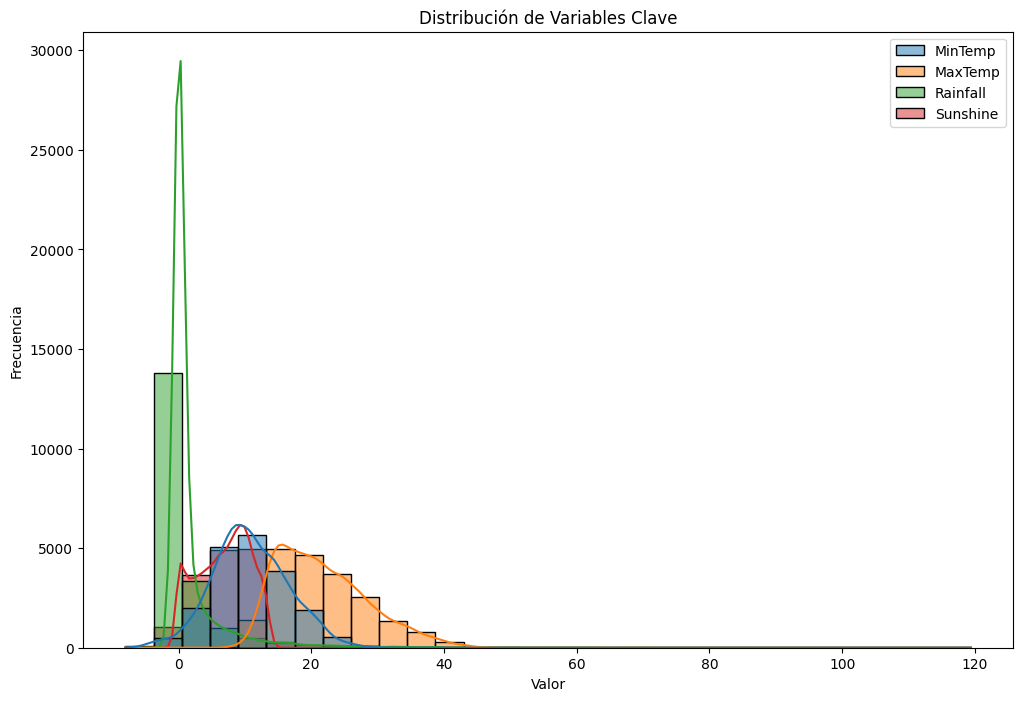

In [534]:
plt.figure(figsize=(12, 8))
sns.histplot(data=X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine']], bins=30, kde=True)
plt.title('Distribución de Variables Clave')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Valores atípicos en algunas variables

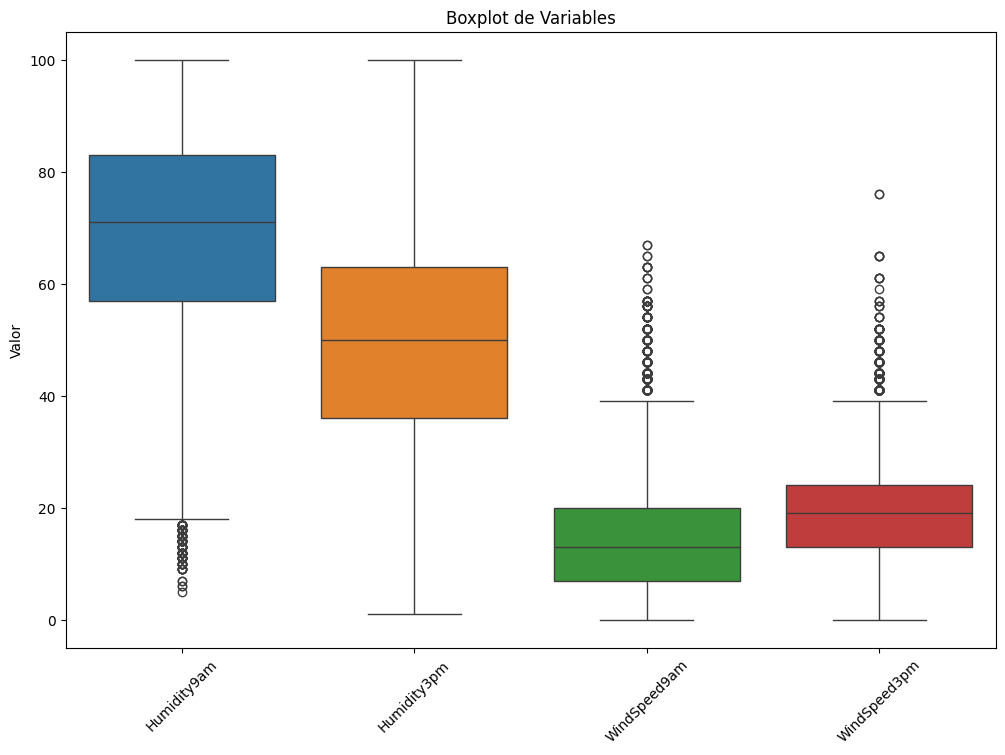

In [535]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train[['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']])
plt.title('Boxplot de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


Scatter para entender realaciones entre mintemp vs maxtemp o rainfall vc sunshine para identificar patrones

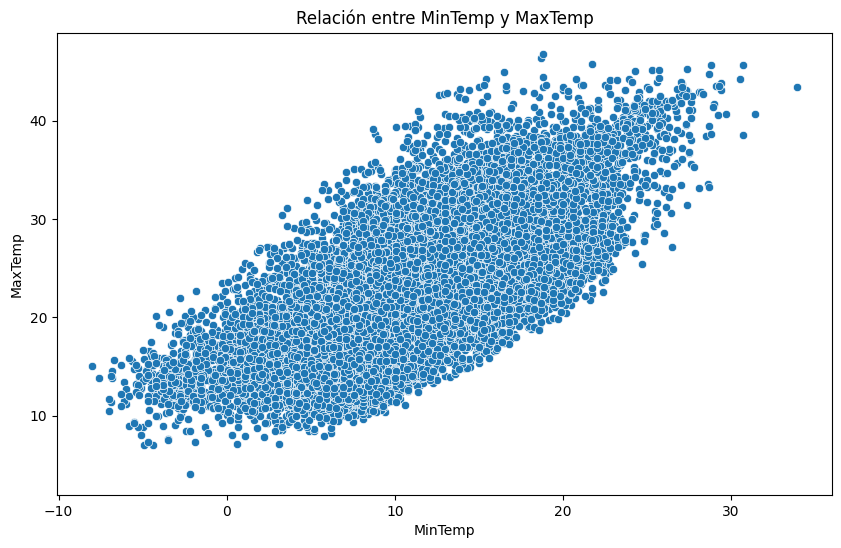

In [536]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=X_train)
plt.title('Relación entre MinTemp y MaxTemp')
plt.show()

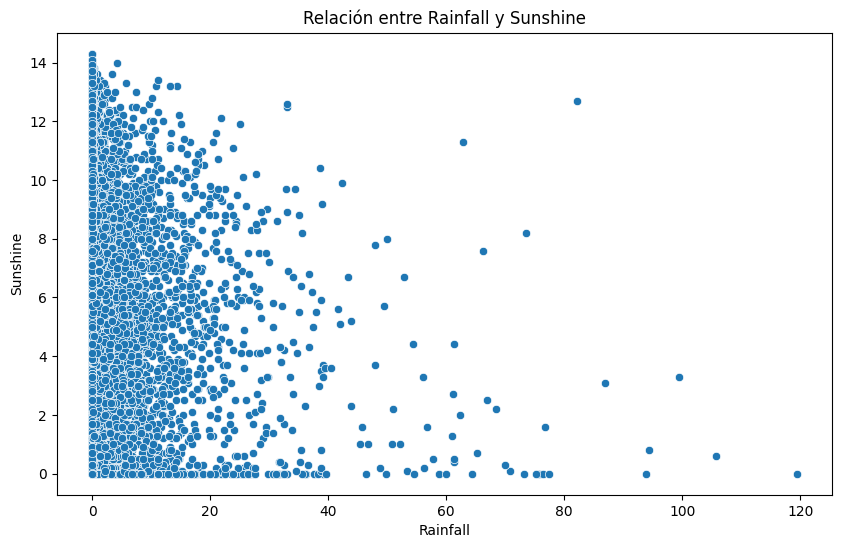

In [537]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall', y='Sunshine', data=X_train)
plt.title('Relación entre Rainfall y Sunshine')
plt.show()

Distribucion de si llovio o no.

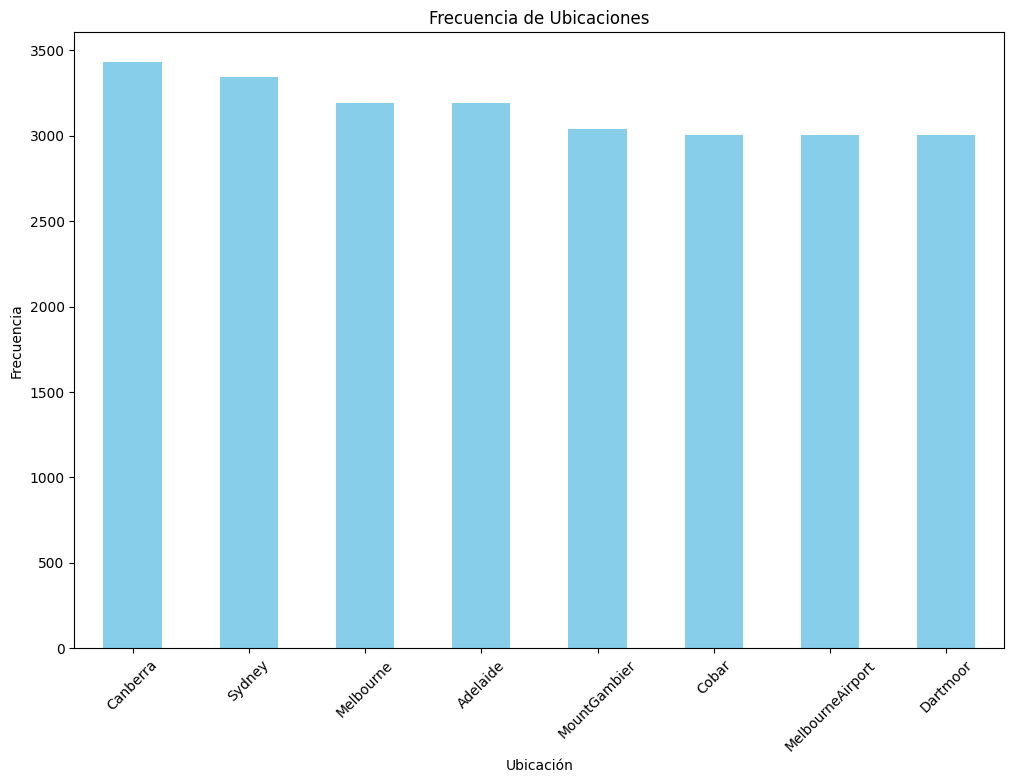

In [538]:
plt.figure(figsize=(12, 8))
df['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Ubicaciones')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

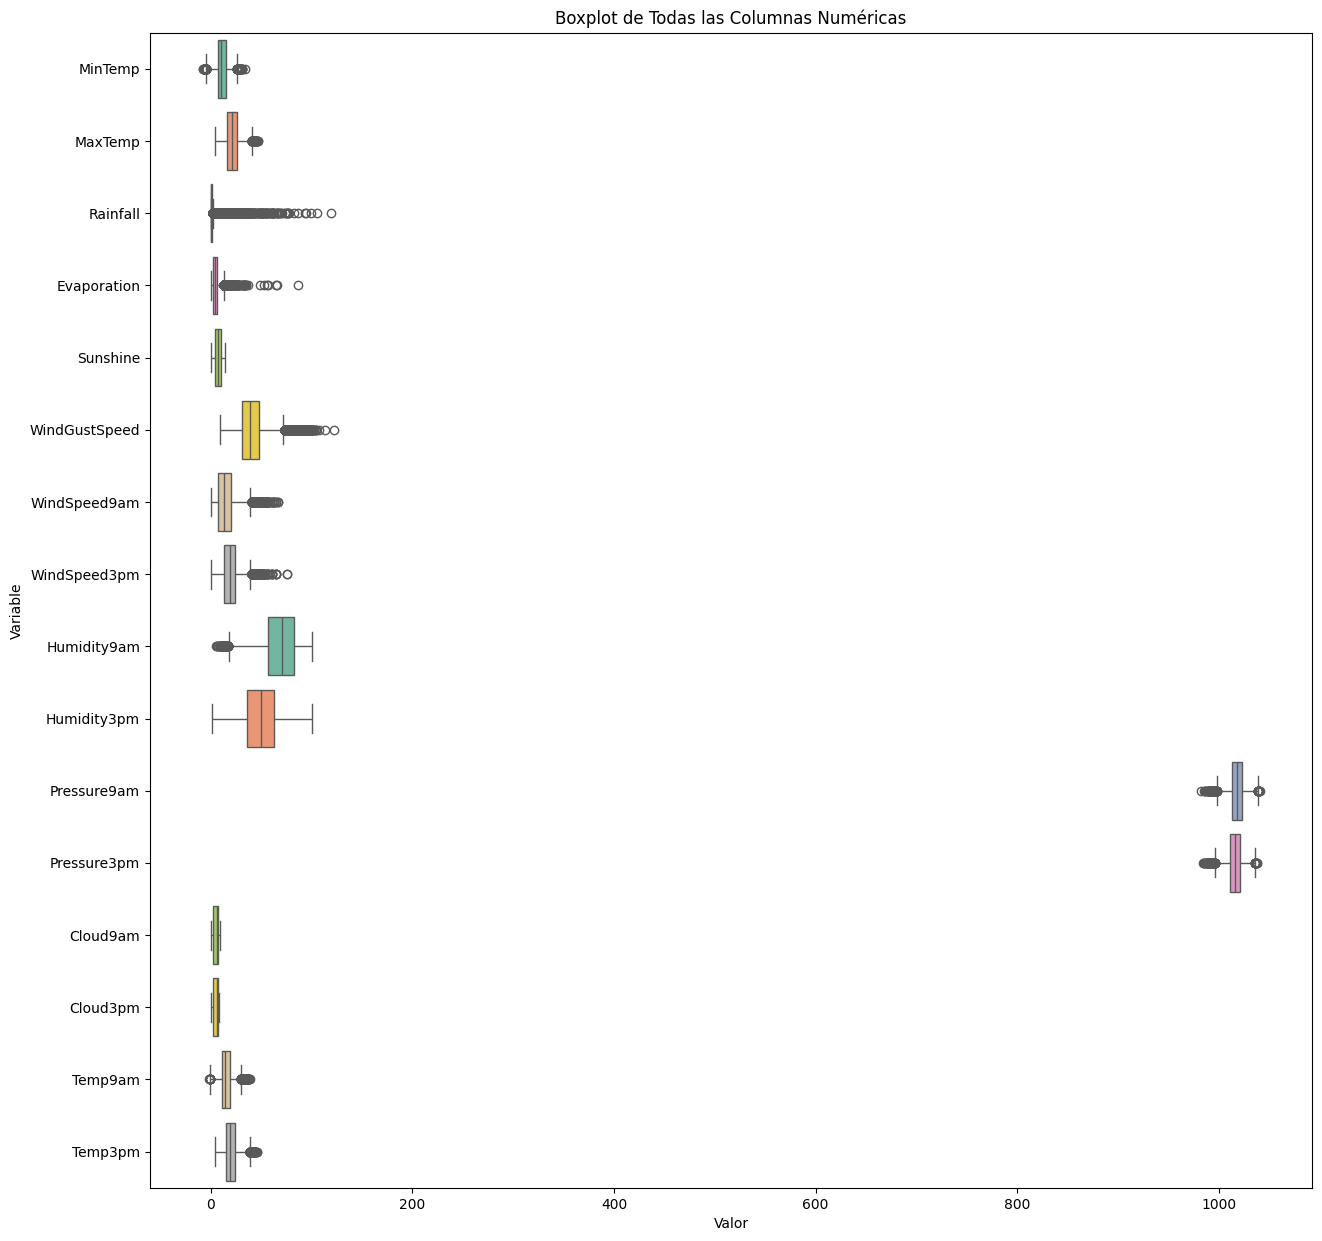

In [539]:
# Seleccionar solo las columnas numéricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int64'])

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 15))
sns.boxplot(data=numeric_columns, orient='h', palette='Set2')

# Añadir título y etiquetas
plt.title('Boxplot de Todas las Columnas Numéricas')
plt.xlabel('Valor')
plt.ylabel('Variable')

# Mostrar el boxplot
plt.show()

# Nulos

In [540]:
X_train.isnull().sum()
X_test.isnull().sum()

MinTemp            106
MaxTemp            106
Rainfall           188
Evaporation        878
Sunshine          1344
                  ... 
WindDir3pm_SSW       0
WindDir3pm_SW        0
WindDir3pm_W         0
WindDir3pm_WNW       0
WindDir3pm_WSW       0
Length: 70, dtype: int64

In [541]:
y1_train.isnull().sum()
y1_test.isnull().sum()

181

In [542]:
y1_train = y1_train.dropna()
y1_test = y1_test.dropna()

In [543]:
#df['WindGustDir'].head(4)
#df['WindGustSpeed'].head(4)
#df['WindDir9am'].head(4)
#df['WindDir3pm'].head(4)
#df['RainToday'].head(4)
#df['RainTomorrow'].head(4)


### Nulos numéricos

Valores nulos de Mediana, son aquellos valores que decidimos completar con esta medida, por ejemplo las temperaturas minimas y maximas, los valores de Rainfall y Evaporation, la presion a las 3 y 9, nubosidad y temperatura a 3 y 9

In [544]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(data, col):
    mediana = data.groupby(['Season'])[col].transform('median')
    data.loc[data[col].isnull(), col] = mediana

In [545]:
# Min temp
nulos_mediana(X_train,'MinTemp')
nulos_mediana(X_test,'MinTemp')

# Max temp
nulos_mediana(X_train,'MaxTemp')
nulos_mediana(X_test,'MaxTemp')

# Rainfall
nulos_mediana(X_train,'Rainfall')
nulos_mediana(X_test,'Rainfall')

# Evaporation
nulos_mediana(X_train, 'Evaporation')
nulos_mediana(X_test, 'Evaporation')

# Pressure9am
nulos_mediana(X_train,'Pressure9am')
nulos_mediana(X_test,'Pressure9am')

# Pressure3pm
nulos_mediana(X_train,'Pressure3pm')
nulos_mediana(X_test,'Pressure3pm')

# Temp9am , 3pm
nulos_mediana(X_train,'Temp9am')
nulos_mediana(X_test,'Temp9am')
              
nulos_mediana(X_train,'Temp3pm')
nulos_mediana(X_test,'Temp3pm')

# WindGustSpeed
nulos_mediana(X_train,'WindGustSpeed')
nulos_mediana(X_test,'WindGustSpeed')

# WindSpeed
nulos_mediana(X_train,'WindSpeed9am')
nulos_mediana(X_test,'WindSpeed9am')

nulos_mediana(X_train,'WindSpeed3pm')
nulos_mediana(X_test,'WindSpeed3pm')

Valores nulos que decidimos llenar con la media, debido a sus pocos casos atipicos. Sunshine, Humidity, Cloud

In [546]:
def nulos_media(data,col):
    media = data.groupby(['Season'])[col].transform('mean')
    data[col].fillna(media, inplace=True)

In [547]:
# Sunshine
nulos_media(X_train,'Sunshine')
nulos_media(X_test,'Sunshine')

# Humidity 9am
nulos_media(X_train,'Humidity9am')
nulos_media(X_test,'Humidity9am')

nulos_media(X_train,'Humidity3pm')
nulos_media(X_test,'Humidity3pm')

# Cloud
nulos_media(X_train, 'Cloud9am')
nulos_media(X_test, 'Cloud9am')

nulos_media(X_train,'Cloud3pm')
nulos_media(X_test,'Cloud3pm')


## Eliminamos Season

In [548]:
X_train = pd.get_dummies(X_train, columns=['Season'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Season'], drop_first=True)

Comprobamos que no hay mas nulos.

In [549]:
null_counts = X_test.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


In [550]:
null_counts = X_train.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


Series([], dtype: int64)


# Matriz

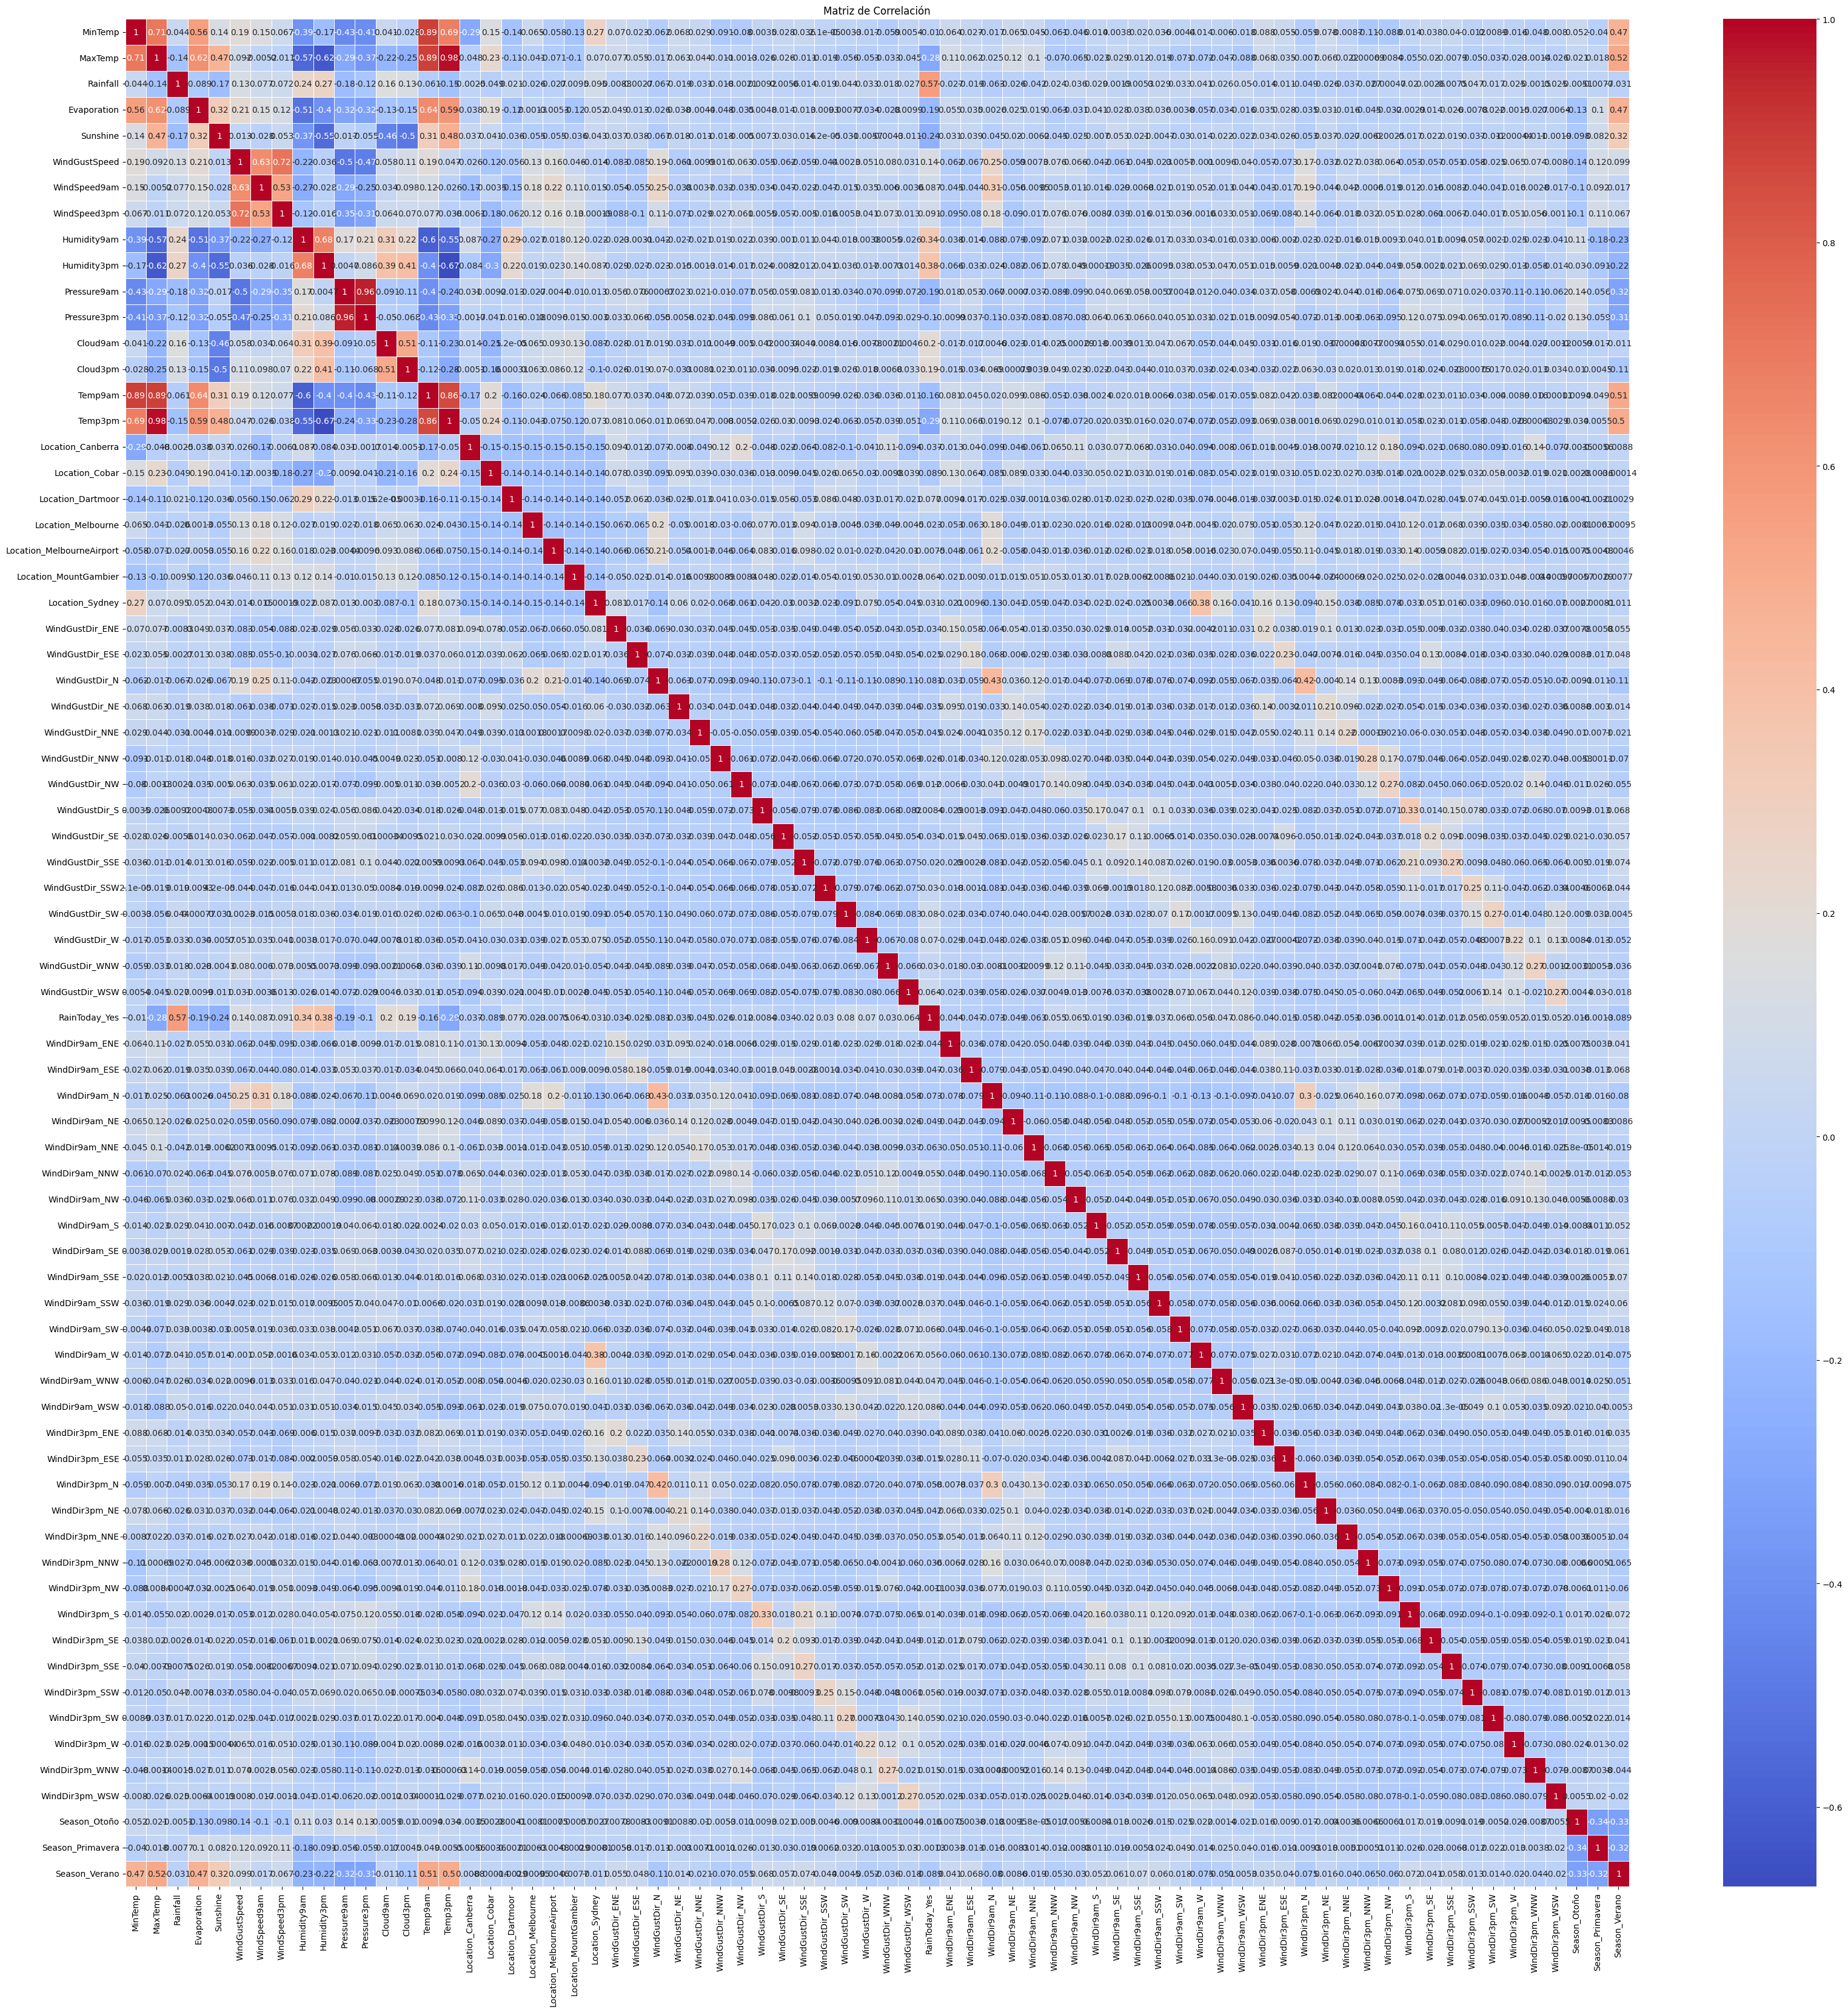

In [551]:
corr_matrix = X_train.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Balanceado

 Muestra la frecuencia de cada combinación de clases entre las dos variables objetivo.

In [552]:
class_counts = df.groupby(['RainfallTomorrow', 'RainTomorrow']).size().unstack(fill_value=0)
print(class_counts)

RainTomorrow         No  Yes
RainfallTomorrow            
0.0               14995    0
0.1                   2    0
0.2                1580    0
0.4                 716    0
0.6                 534    0
...                 ...  ...
95.2                  0    1
99.4                  0    1
105.8                 0    1
109.4                 0    1
119.4                 0    1

[279 rows x 2 columns]


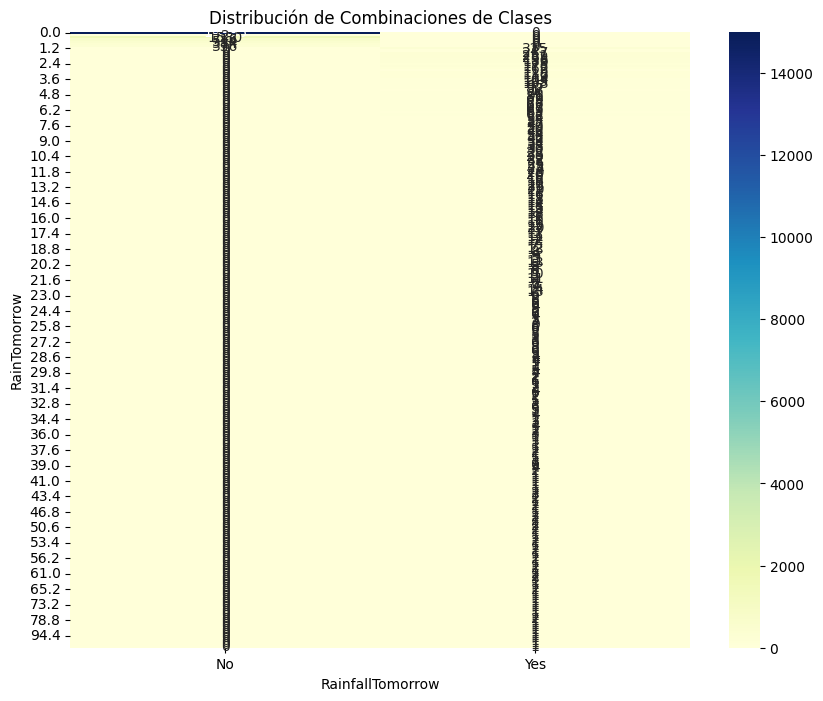

In [553]:
plt.figure(figsize=(10, 8))
sns.heatmap(class_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distribución de Combinaciones de Clases')
plt.xlabel('RainfallTomorrow')
plt.ylabel('RainTomorrow')
plt.show()

Calcular la proporción de cada combinación de clases

In [554]:
total_samples = len(df)
class_proportions = class_counts.div(total_samples)
print(class_proportions)

RainTomorrow            No      Yes
RainfallTomorrow                   
0.0               0.594450  0.00000
0.1               0.000079  0.00000
0.2               0.062636  0.00000
0.4               0.028385  0.00000
0.6               0.021169  0.00000
...                    ...      ...
95.2              0.000000  0.00004
99.4              0.000000  0.00004
105.8             0.000000  0.00004
109.4             0.000000  0.00004
119.4             0.000000  0.00004

[279 rows x 2 columns]


# Estadarizacion de los datos

In [555]:
from sklearn.preprocessing import StandardScaler

¿Por qué estandarizar?
La estandarización es un proceso importante en el preprocesamiento de datos.
 La estandarización generalmente implica transformar las características para que tengan una media cercana a cero y una desviación estándar de uno. 
 Esto ayuda a que las características estén en la misma escala, lo que puede mejorar la convergencia del modelo y la interpretación de los pesos de las características.

In [556]:
df_train_regresion = pd.concat([X_train,y1_train], axis = 1)
df_test_regresion = pd.concat([X_test,y1_test], axis = 1)

In [557]:
df_train_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_test_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [558]:
df_x_train = df_train_regresion.iloc[:,:-1]
df_y_train = df_train_regresion.iloc[:,-1]

df_x_test = df_test_regresion.iloc[:,:-1]
df_y_test = df_test_regresion.iloc[:,-1]

In [559]:
df_y_test = df_y_test.fillna(method='ffill')
df_y_train = df_y_train.fillna(method='ffill')

In [560]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(df_x_train)

In [561]:
x_test_scaled = scaler.fit_transform(df_x_test)

Es crucial aplicar la misma transformación (media y desviación estándar) que se aprendió del conjunto de entrenamiento (x_train) al conjunto de prueba (x_test). Esto asegura que las características en ambos conjuntos estén en la misma escala relativa. Si aplicas una transformación diferente a x_test, introducirías filtraciones de información del conjunto de prueba al conjunto de entrenamiento, lo cual puede llevar a una evaluación sesgada del modelo.

# Linear Regression

In [562]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [563]:
regresion = LinearRegression()

In [564]:
regresion.fit(x_train_scaled, df_y_train)

LinearRegression()

## Métricas adecuadas

In [565]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [569]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))

In [571]:
y_pred_regresion = regresion.predict(x_test_scaled)

errores(df_y_test, y_pred_regresion)

R2:   0.34
MSE:  0.12
RMSE: 0.35
MAE:  0.26


# Metodo gradiente descendiente

In [572]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [573]:
sgd_regressor = SGDRegressor() # Modelo de regresion con gradiente descendiente

In [574]:
sgd_regressor.fit(x_train_scaled, df_y_train)

SGDRegressor()

Predict 

In [575]:
y_train_pred_sgd = sgd_regressor.predict(x_train_scaled)
y_test_pred_sgd = sgd_regressor.predict(x_test_scaled)


Evaluar el modelo

In [576]:
train_mse_sgd = mean_squared_error(df_y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(df_y_test, y_test_pred_sgd)

train_r2_sgd = r2_score(df_y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(df_y_test, y_test_pred_sgd)

# Imprimir las métricas obtenidas
print("Métricas del modelo con Gradiente Descendiente:")
print("MSE (entrenamiento):", train_mse_sgd)
print("MSE (prueba):", test_mse_sgd)
print("R2 Score (entrenamiento):", train_r2_sgd)
print("R2 Score (prueba):", test_r2_sgd)

Métricas del modelo con Gradiente Descendiente:
MSE (entrenamiento): 0.11971814489732659
MSE (prueba): 0.12092061767793788
R2 Score (entrenamiento): 0.33070220925187543
R2 Score (prueba): 0.3329703978859304


# Lasso

In [577]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [578]:
lasso_regressor = Lasso() # Modelo de regresion con regularizacion lasso

In [579]:
lasso_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Lasso()

Predict

In [584]:
y_train_pred_lasso = lasso_regressor.predict(x_train_scaled)
y_test_pred_lasso = lasso_regressor.predict(x_test_scaled)

Evaluamos

In [585]:
train_mse_lasso = mean_squared_error(df_y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(df_y_test, y_test_pred_lasso)

In [586]:

print("Métricas del modelo Lasso:")
print("MSE (entrenamiento):", train_mse_lasso)
print("MSE (prueba):", test_mse_lasso)


Métricas del modelo Lasso:
MSE (entrenamiento): 0.1788712685925776
MSE (prueba): 0.18130302009368604


# Ridge

In [587]:
ridge_regressor = Ridge() # Modelo de regresion con regularizacion Ridge

In [588]:
ridge_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Ridge()

Predicts

In [590]:
y_train_pred_ridge = ridge_regressor.predict(x_train_scaled)
y_test_pred_ridge = ridge_regressor.predict(x_test_scaled)

MSE

In [591]:
train_mse_ridge = mean_squared_error(df_y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(df_y_test, y_test_pred_ridge)

In [592]:
print("\nMétricas del modelo Ridge:")
print("MSE (entrenamiento):", train_mse_ridge)
print("MSE (prueba):", test_mse_ridge)


Métricas del modelo Ridge:
MSE (entrenamiento): 0.11838714866247767
MSE (prueba): 0.11977148818763333


# ElasticNET

In [593]:
elasticnet_regressor = ElasticNet() # Modelo con Elastic Net

In [594]:
elasticnet_regressor.fit(x_train_scaled, df_y_train) # Entrenamos


ElasticNet()

Predicts

In [595]:
y_train_pred_elasticnet = elasticnet_regressor.predict(x_train_scaled)
y_test_pred_elasticnet = elasticnet_regressor.predict(x_test_scaled)

MSE

In [596]:
train_mse_elasticnet = mean_squared_error(df_y_train, y_train_pred_elasticnet)
test_mse_elasticnet = mean_squared_error(df_y_test, y_test_pred_elasticnet)

In [597]:
print("\nMétricas del modelo ElasticNet:")
print("MSE (entrenamiento):", train_mse_elasticnet)
print("MSE (prueba):", test_mse_elasticnet)


Métricas del modelo ElasticNet:
MSE (entrenamiento): 0.1788712685925776
MSE (prueba): 0.18130302009368604


# ¿Fue un buen fitting?